<a href="https://colab.research.google.com/github/SlavaAndrei/DataScience/blob/main/Homework3/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Новый раздел

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Загрузка датасета
df = pd.read_csv(
    '/content/drive/MyDrive/Colab Notebooks/car.csv',
    header=None,
    names=["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"],
    index_col=False,
    sep=','
)

In [ ]:
# Просмотр первых строк датасета
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


База данных оценки автомобилей была получена на основе простой иерархической модели принятия решений, первоначально разработанной для демонстрации DEX, М. Боханец, В. Райкович: Экспертная система для принятия решений. Системика 1(1), стр. 145-157, 1990.). Модель оценивает автомобили согласно следующей концептуальной структуре:

АВТОМОБИЛЬ Приемлемость автомобиля

. ЦЕНА общая цена

. . цена покупки

. . основная цена обслуживания

. Технические характеристики

. . КОМФОРТ комфорт

. . . двери количество дверей

. . . вместимость людей c точки зрения людей для перевозки

. . . lug_boot размер багажника

. . безопасность расчетная безопасность автомобиля


Входные атрибуты печатаются строчными буквами. Помимо целевой концепции (АВТОМОБИЛЬ) в модель включены три промежуточных понятия: ЦЕНА, ТЕХНОЛОГИЯ, КОМФОРТ. Каждая концепция в исходной модели связана с ее потомками более низкого уровня с помощью набора примеров (наборы примеров см. на http://www-ai.ijs.si/BlazZupan/car.html).

База данных оценки автомобилей содержит примеры с удаленной структурной информацией, т. е. напрямую связывает CAR с шестью входными атрибутами: покупка, обслуживание, двери, люди, lug_boot, безопасность.

Благодаря известной базовой концептуальной структуре эта база данных может быть особенно полезна для тестирования методов конструктивной индукции и обнаружения структуры.

In [ ]:
# Базовые статистики
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [ ]:
# Проверка на пропущенные значения
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [ ]:
# Преобразование категориальных данных в числовые (Create an instance of the encoder)
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [ ]:
# Fit and transform the names=["buying", "maint", "doors", "persons", "lug_boot", "safety"] column
df['encoded_buying'] = encoder.fit_transform(df['buying'])
df['encoded_maint'] = encoder.fit_transform(df['maint'])
df['encoded_doors'] = encoder.fit_transform(df['doors'])
df['encoded_persons'] = encoder.fit_transform(df['persons'])
df['encoded_lug_boot'] = encoder.fit_transform(df['lug_boot'])
df['encoded_safety'] = encoder.fit_transform(df['safety'])

In [ ]:
# Повторный анализ структуры данных после преобразования типов
df.dtypes

buying              object
maint               object
doors               object
persons             object
lug_boot            object
safety              object
class               object
encoded_buying       int64
encoded_maint        int64
encoded_doors        int64
encoded_persons      int64
encoded_lug_boot     int64
encoded_safety       int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   buying            1728 non-null   object
 1   maint             1728 non-null   object
 2   doors             1728 non-null   object
 3   persons           1728 non-null   object
 4   lug_boot          1728 non-null   object
 5   safety            1728 non-null   object
 6   class             1728 non-null   object
 7   encoded_buying    1728 non-null   int64 
 8   encoded_maint     1728 non-null   int64 
 9   encoded_doors     1728 non-null   int64 
 10  encoded_persons   1728 non-null   int64 
 11  encoded_lug_boot  1728 non-null   int64 
 12  encoded_safety    1728 non-null   int64 
dtypes: int64(6), object(7)
memory usage: 175.6+ KB


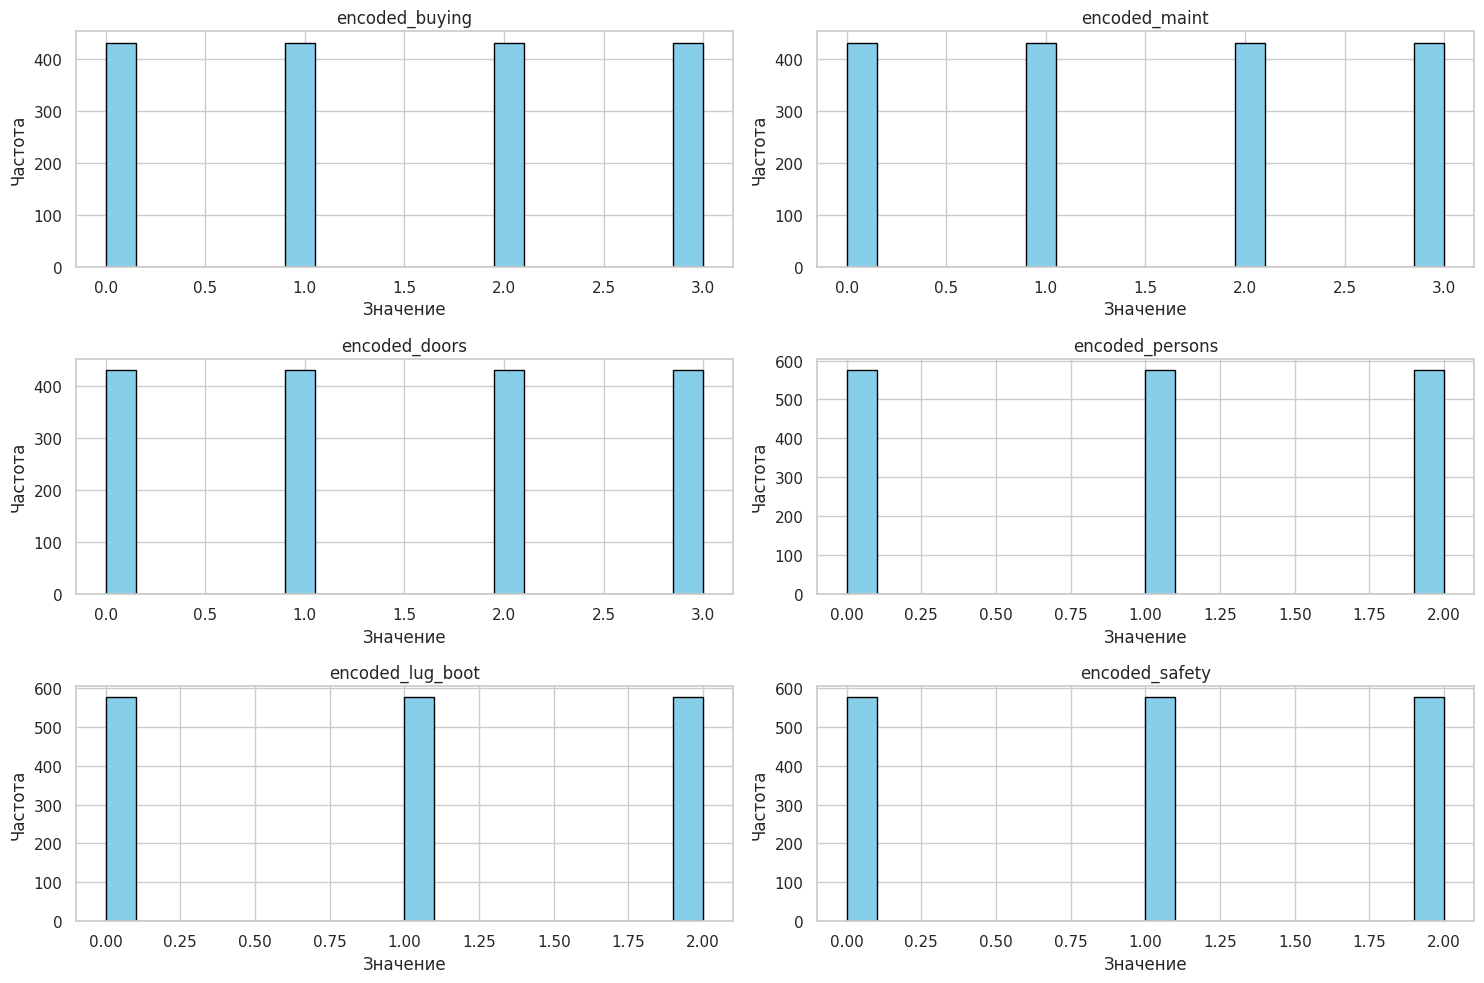

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Установка стиля Seaborn для красивых графиков
sns.set(style="whitegrid")

# Создание гистограмм для каждой числовой переменной
df.iloc[:, 6:].hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')

# Добавление названий для каждого графика и осей
for ax in plt.gcf().get_axes():
    ax.set_xlabel('Значение')
    ax.set_ylabel('Частота')
    ax.set_title(ax.get_title().replace('class', 'Класс'))

# Регулировка макета для предотвращения наложения подписей
plt.tight_layout()

# Показать график
plt.show()

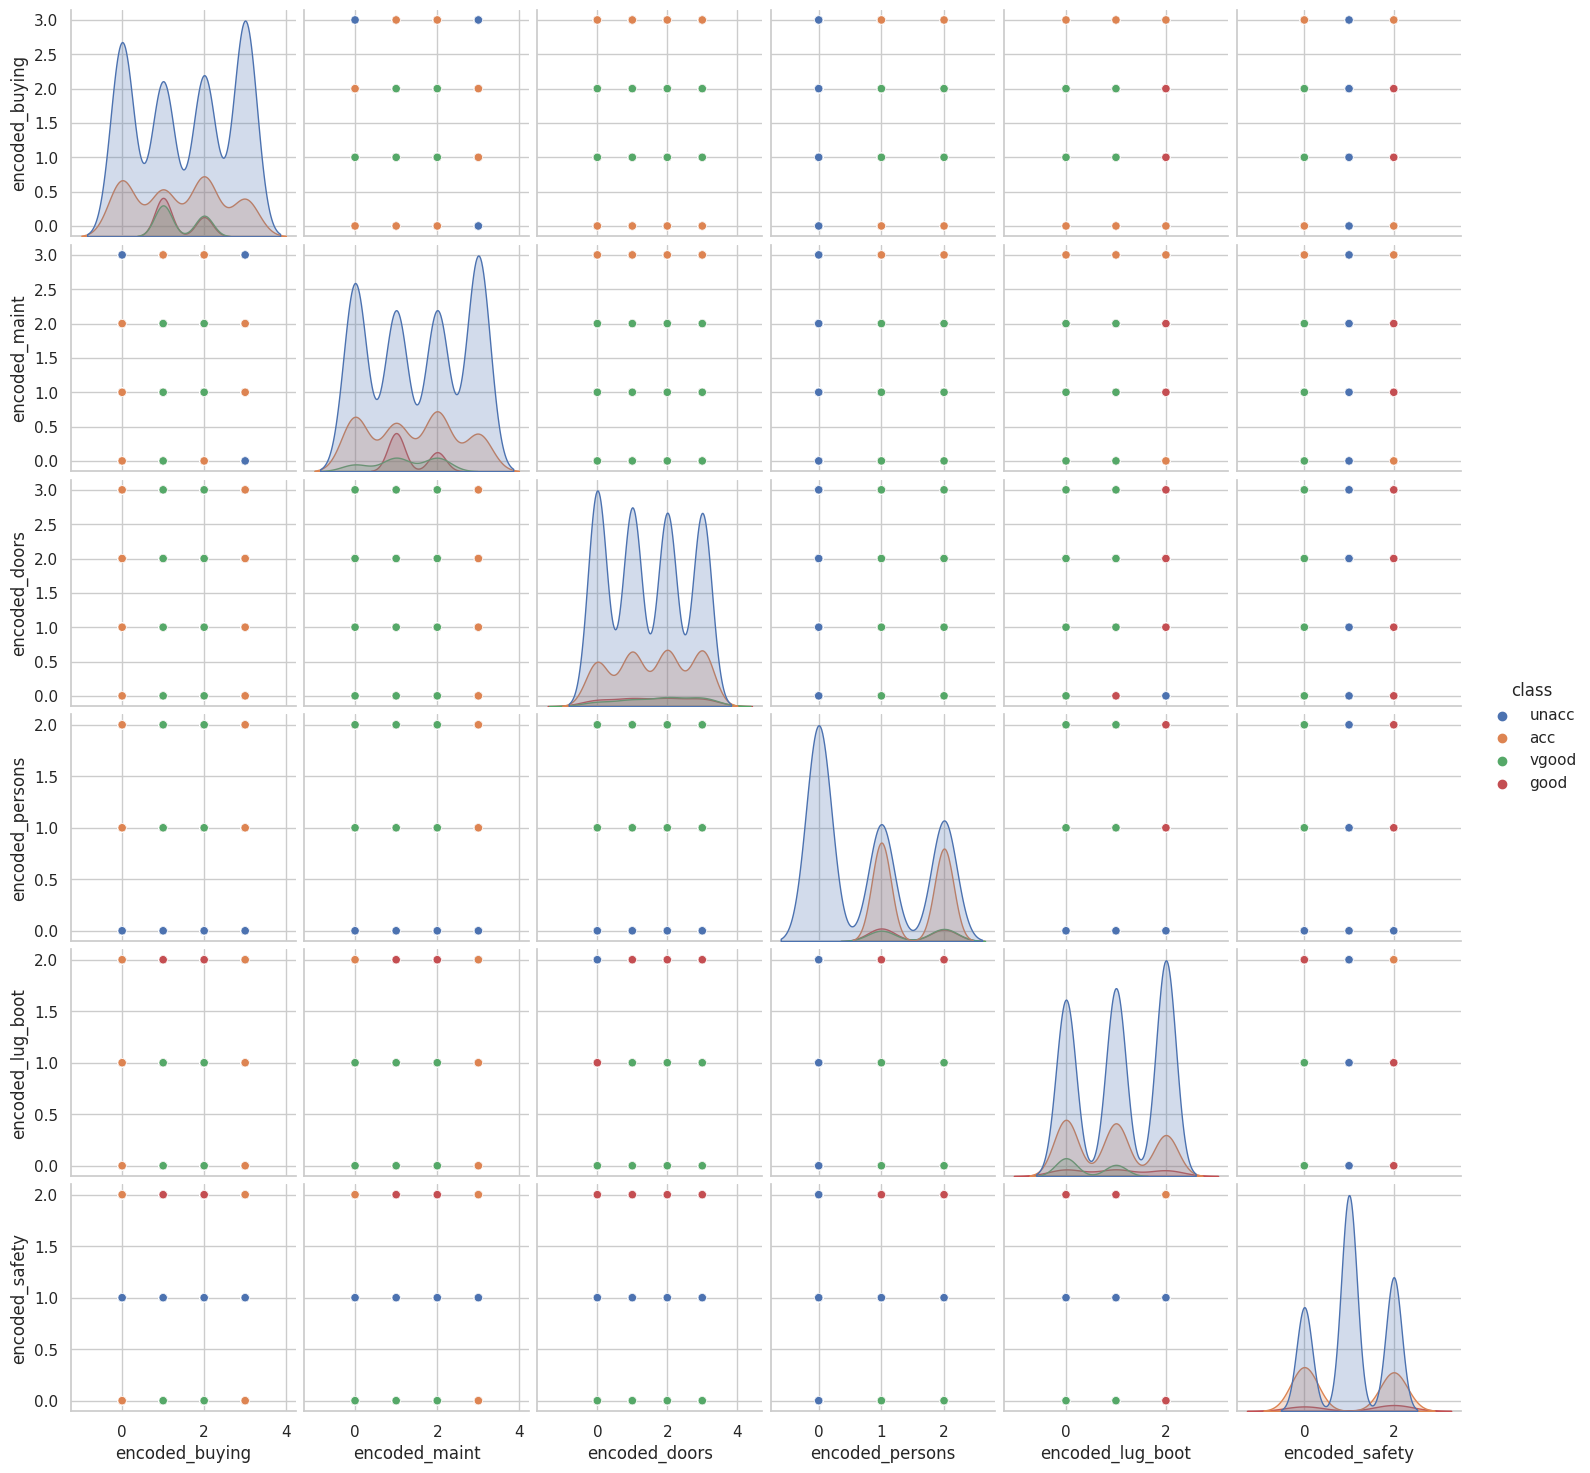

In [ ]:
# Парные диаграммы рассеяния
sns.pairplot(df.iloc[:, 6:], hue="class")
plt.show()

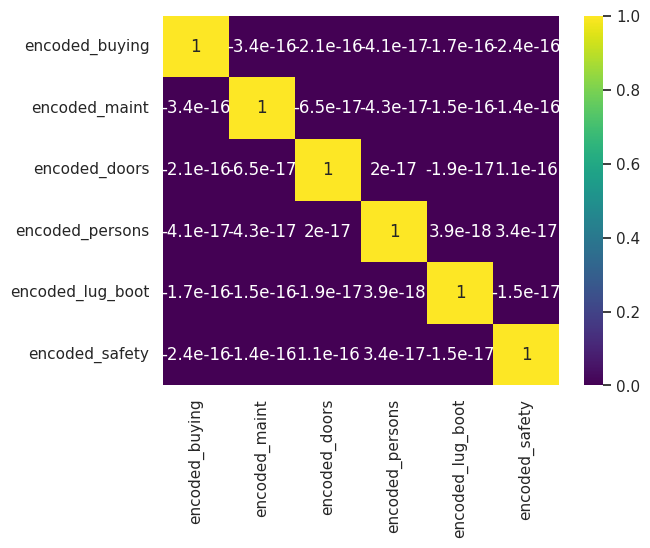

In [ ]:

# Некрасивая Тепловая карта корреляций
sns.heatmap(df.iloc[:, 7:].corr(), annot=True, cmap='viridis')
plt.show()

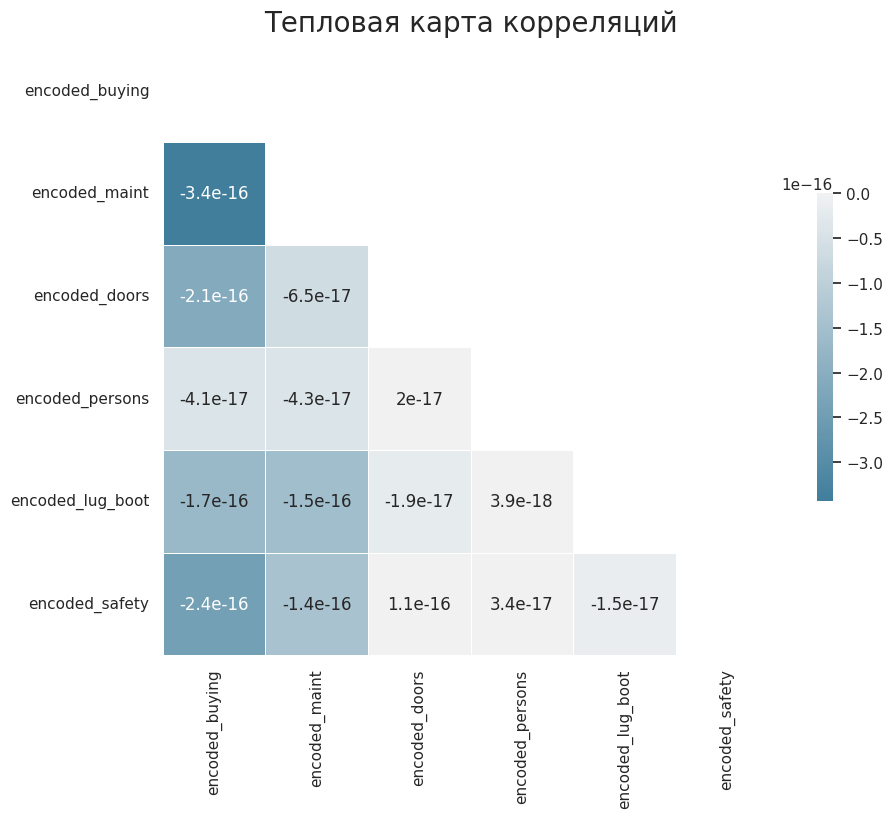

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Установка стиля Seaborn
sns.set(style="white")

# Расчет корреляционной матрицы
corr = df.iloc[:, 7:].corr()

# Маска для отображения только нижней треугольной части матрицы (опционально)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Настройка цветовой палитры
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Создание тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.00000000000000000001, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# Добавление заголовка
plt.title('Тепловая карта корреляций', fontsize=20)

# Показать график
plt.show()

Тепловая карта корреляций — это визуальный инструмент, используемый для представления степени корреляции между переменными в наборе данных. Вот как её интерпретировать:

Основы Интерпретации
Цвета и Их Значения:

Тепловые карты обычно используют цветовую шкалу для представления величины корреляции. Например, в типичной цветовой палитре голубой может обозначать высокую положительную корреляцию, красный — высокую отрицательную корреляцию, а белый или нейтральный цвет — отсутствие корреляции.

Значения Корреляции:

Числовые значения на тепловой карте (если они представлены) указывают на коэффициент корреляции между парами переменных. Эти значения обычно находятся в диапазоне от -1 до 1.

Значение +1 означает совершенную положительную корреляцию (как одна переменная увеличивается, так и другая).

Значение -1 означает совершенную отрицательную корреляцию (одна переменная увеличивается, другая уменьшается).

Значение 0 указывает на отсутствие корреляции.

Диагональ:

На главной диагонали тепловой карты (где переменная сравнивается сама с собой) корреляция всегда равна 1.

Если тепловая карта показывает высокую положительную корреляцию между двумя переменными, это означает, что когда одна переменная увеличивается, другая также, как правило, увеличивается.
Высокая отрицательная корреляция означает, что увеличение одной переменной обычно сопровождается уменьшением другой.
Низкие или нулевые значения корреляции указывают на то, что между переменными нет существенной линейной связи.
Практическое Применение
Выбор Переменных для Моделей: Избегание использования сильно коррелирующих переменных в одной и той же предиктивной модели, так как это может привести к мультиколлинеарности.
Понимание Взаимосвязей: Помогает в понимании, какие переменные могут влиять друг на друга, что особенно полезно в исследовательском анализе данных и при построении гипотез.
Тепловая карта корреляций — мощный инструмент для визуализации и анализа взаимосвязей в данных, позволяющий быстро выявлять потенциально значимые связи между переменными.

In [ ]:
df.dtypes

buying              object
maint               object
doors               object
persons             object
lug_boot            object
safety              object
class               object
encoded_buying       int64
encoded_maint        int64
encoded_doors        int64
encoded_persons      int64
encoded_lug_boot     int64
encoded_safety       int64
dtype: object

Выводы из Первичного Анализа Данных

Структура Данных:
Датасет состоит из 1728 образцов автомобилей
с 4 категориальными признаками,
с 2 числовыми признаками (верхние значения которых тоже категориальны)
а также целевой переменной class, которая представляет собой класс спроса.

Статистический Анализ:

Средние Значения: **Средние значения признаков, например, alcohol (13.00), malic_acid (2.33), показывают центральную тенденцию каждого признака.**

Стандартное Отклонение: **Значения стандартного отклонения, такие как magnesium (14.28), указывают на разброс данных вокруг среднего.**

Мин/Макс Значения: **Неприменимы к категориям.**

Отсутствие Пропущенных Значений: Отсутствие пропущенных значений в датасете указывает на то, что данные полны и готовы к анализу.

In [ ]:
#Подготовка данных к моделированию

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Разделение данных на признаки и целевую переменную
X = df.iloc[:, 7:]
y = df['class']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Стандартизация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[ 0.43665601,  0.44315443,  1.34600219, -0.00511298, -1.22301629,
        -1.2097176 ],
       [-1.35289354, -1.34275791, -0.42957517,  1.23120614,  1.21294202,
         0.01828289],
       [-0.45811877,  0.44315443, -0.42957517, -0.00511298, -0.00503713,
         1.24628337],
       ...,
       [-1.35289354, -0.44980174,  1.34600219,  1.23120614, -0.00503713,
        -1.2097176 ],
       [-0.45811877, -1.34275791,  0.45821351, -1.2414321 ,  1.21294202,
         1.24628337],
       [ 0.43665601,  0.44315443, -0.42957517,  1.23120614,  1.21294202,
         1.24628337]])

In [ ]:
X_test_scaled

array([[-1.35289354, -1.34275791,  0.45821351, -1.2414321 , -0.00503713,
        -1.2097176 ],
       [ 0.43665601, -0.44980174, -1.31736385, -0.00511298, -0.00503713,
         1.24628337],
       [-1.35289354, -1.34275791,  1.34600219, -1.2414321 , -1.22301629,
         1.24628337],
       ...,
       [ 1.33143079,  0.44315443,  0.45821351, -0.00511298, -1.22301629,
        -1.2097176 ],
       [-0.45811877, -0.44980174, -1.31736385,  1.23120614,  1.21294202,
         1.24628337],
       [-0.45811877, -0.44980174,  1.34600219, -0.00511298, -0.00503713,
         1.24628337]])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Логистическая регрессия
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Случайный лес
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [ ]:
# Предсказания логистической регрессии
y_pred_log_reg = log_reg.predict(X_test_scaled)
print("Accuracy of Logistic Regression: ", accuracy_score(y_test, y_pred_log_reg))

# Предсказания случайного леса
y_pred_rf = rf.predict(X_test_scaled)
print("Accuracy of Random Forest: ", accuracy_score(y_test, y_pred_rf))

# Детальный отчёт по классификации
print("\nClassification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))

Accuracy of Logistic Regression:  0.6628131021194605
Accuracy of Random Forest:  0.9633911368015414

Classification Report for Random Forest:
               precision    recall  f1-score   support

         acc       0.94      0.92      0.93       118
        good       0.64      0.84      0.73        19
       unacc       1.00      0.99      1.00       358
       vgood       0.87      0.83      0.85        24

    accuracy                           0.96       519
   macro avg       0.86      0.90      0.88       519
weighted avg       0.97      0.96      0.96       519



In [ ]:
# Оценка моделей
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_log_reg = classification_report(y_test, y_pred_log_reg)
report_rf = classification_report(y_test, y_pred_rf)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
accuracy_log_reg

0.6628131021194605

In [ ]:
accuracy_rf

0.9633911368015414

In [ ]:
report_log_reg

'              precision    recall  f1-score   support\n\n         acc       0.29      0.17      0.21       118\n        good       0.00      0.00      0.00        19\n       unacc       0.73      0.90      0.81       358\n       vgood       0.12      0.04      0.06        24\n\n    accuracy                           0.66       519\n   macro avg       0.29      0.28      0.27       519\nweighted avg       0.58      0.66      0.61       519\n'

In [ ]:
report_rf

'              precision    recall  f1-score   support\n\n         acc       0.94      0.92      0.93       118\n        good       0.64      0.84      0.73        19\n       unacc       1.00      0.99      1.00       358\n       vgood       0.87      0.83      0.85        24\n\n    accuracy                           0.96       519\n   macro avg       0.86      0.90      0.88       519\nweighted avg       0.97      0.96      0.96       519\n'